In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
classifier = Sequential()

In [3]:
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3)))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
classifier.add(Activation('relu'))

In [5]:
classifier.add(MaxPooling2D(pool_size =(2,2)))

In [6]:
classifier.add(Conv2D(32,(3,3))) 
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))
classifier.add(Conv2D(32,(3,3))) 
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

In [7]:
classifier.add(Flatten())

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
classifier.add(Dense(64))
classifier.add(Activation('relu'))

In [9]:
classifier.add(Dropout(0.5))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
classifier.add(Dense(1))

In [11]:
classifier.add(Activation('sigmoid'))

In [12]:
classifier.compile(optimizer ='rmsprop',
                   loss ='binary_crossentropy',
                   metrics =['accuracy'])

In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale =1./255,
                                   shear_range =0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip =True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('train',
                                                target_size=(64,64),
                                                batch_size= 32,
                                                class_mode='binary')

test_set = test_datagen.flow_from_directory('test',
                                           target_size = (64,64),
                                           batch_size = 32,
                                           class_mode ='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [15]:
from IPython.display import display
from PIL import Image
classifier.fit_generator(training_set,
                        steps_per_epoch =500,
                        epochs = 30,
                        validation_data =test_set,
                        validation_steps = 5000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
500/500 [==============================] - 450s - loss: 0.6430 - acc: 0.6238 - val_loss: 0.5499 - val_acc: 0.7057
Epoch 2/30
500/500 [==============================] - 450s - loss: 0.5588 - acc: 0.7179 - val_loss: 0.4966 - val_acc: 0.7610717
Epoch 3/30
500/500 [==============================] - 448s - loss: 0.5095 - acc: 0.7529 - val_loss: 0.4629 - val_acc: 0.7900
Epoch 4/30
500/500 [==============================] - 448s - loss: 0.4866 - acc: 0.7677 - val_loss: 0.4510 - val_acc: 0.7866
Epoch 5/30
500/500 [==============================] - 449s - loss: 0.4627 - acc: 0.7819 - val_loss: 0.4373 - val_acc: 0.7965
Epoch 6/30
500/500 [==============================] - 449s - loss: 0.4601 - acc: 0.7864 - val_loss: 0.4516 - val_acc: 0.7926
Epoch 7/30
500/500 [==============================] - 449s - loss: 0.4369 - acc: 0.8020 - val_loss: 0.3861 - val_acc: 0.8238
Epoch 8/30
500/500 [==============================] - 450s - loss: 0.4227 

In [22]:
classifier.save('mohak_catvsdog_cnn.h5')

In [42]:
from keras.models import load_model 
classifier = load_model('mohak_catvsdog_cnn.h5')

In [132]:
import numpy as np
from keras.preprocessing import image
test_image =image.load_img('catvsdog.jpg',target_size =(64,64))
test_image =image.img_to_array(test_image)
test_image =np.expand_dims(test_image, axis =0)
result = classifier.predict(test_image)
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


In [133]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

Text(150.25, 150.25, 'dog')

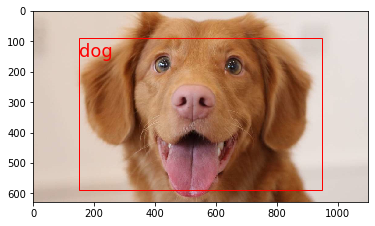

In [134]:
img=mpimg.imread('catvsdog.jpg')
fig,ax = plt.subplots(1)
ax.imshow(img)
rect = patches.Rectangle((150,90),800,500,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
centerx = centery = 150 + 0.5/2
plt.text(centerx,centery,prediction,fontsize='18',color='red')